In [5]:
import os  # Operating system interfaces
import tensorflow as tf                                    # TensorFlow deep learning framework
import matplotlib.pyplot as plt                            # Plotting library
import matplotlib.image as mpimg                           # Image loading and manipulation library
from tensorflow.keras.models import Sequential, Model      # Sequential and Functional API for building models
from tensorflow.keras.optimizers import Adam               # Adam optimizer for model training
from tensorflow.keras.callbacks import EarlyStopping       # Early stopping callback for model training
from tensorflow.keras.regularizers import l1, l2           # L1 and L2 regularization for model regularization
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Data augmentation and preprocessing for images
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D, AveragePooling2D, MaxPooling2D, BatchNormalization  
# Various types of layers for building neural networks
from tensorflow.keras.applications import DenseNet121, EfficientNetB4, Xception, VGG16, VGG19   # Pre-trained models for transfer learning

In [7]:
train_data = tf.keras.utils.image_dataset_from_directory(
    r'C:\Users\Ashutosh\Internship Work\leaf disease detection\tomato\train',
    labels='inferred',
    label_mode='categorical',
    image_size=(256, 256),
    batch_size=32)

train_data = train_data.map(lambda x, y: (x / 255.0, y))

Found 10000 files belonging to 10 classes.


In [9]:
val_data = tf.keras.preprocessing.image_dataset_from_directory(
    r'C:\Users\Ashutosh\Internship Work\leaf disease detection\tomato\val',
    labels='inferred',
    label_mode='categorical',
    image_size=(256, 256),
    batch_size=32)

val_data = val_data.map(lambda x, y: (x / 255.0, y))

Found 1000 files belonging to 10 classes.


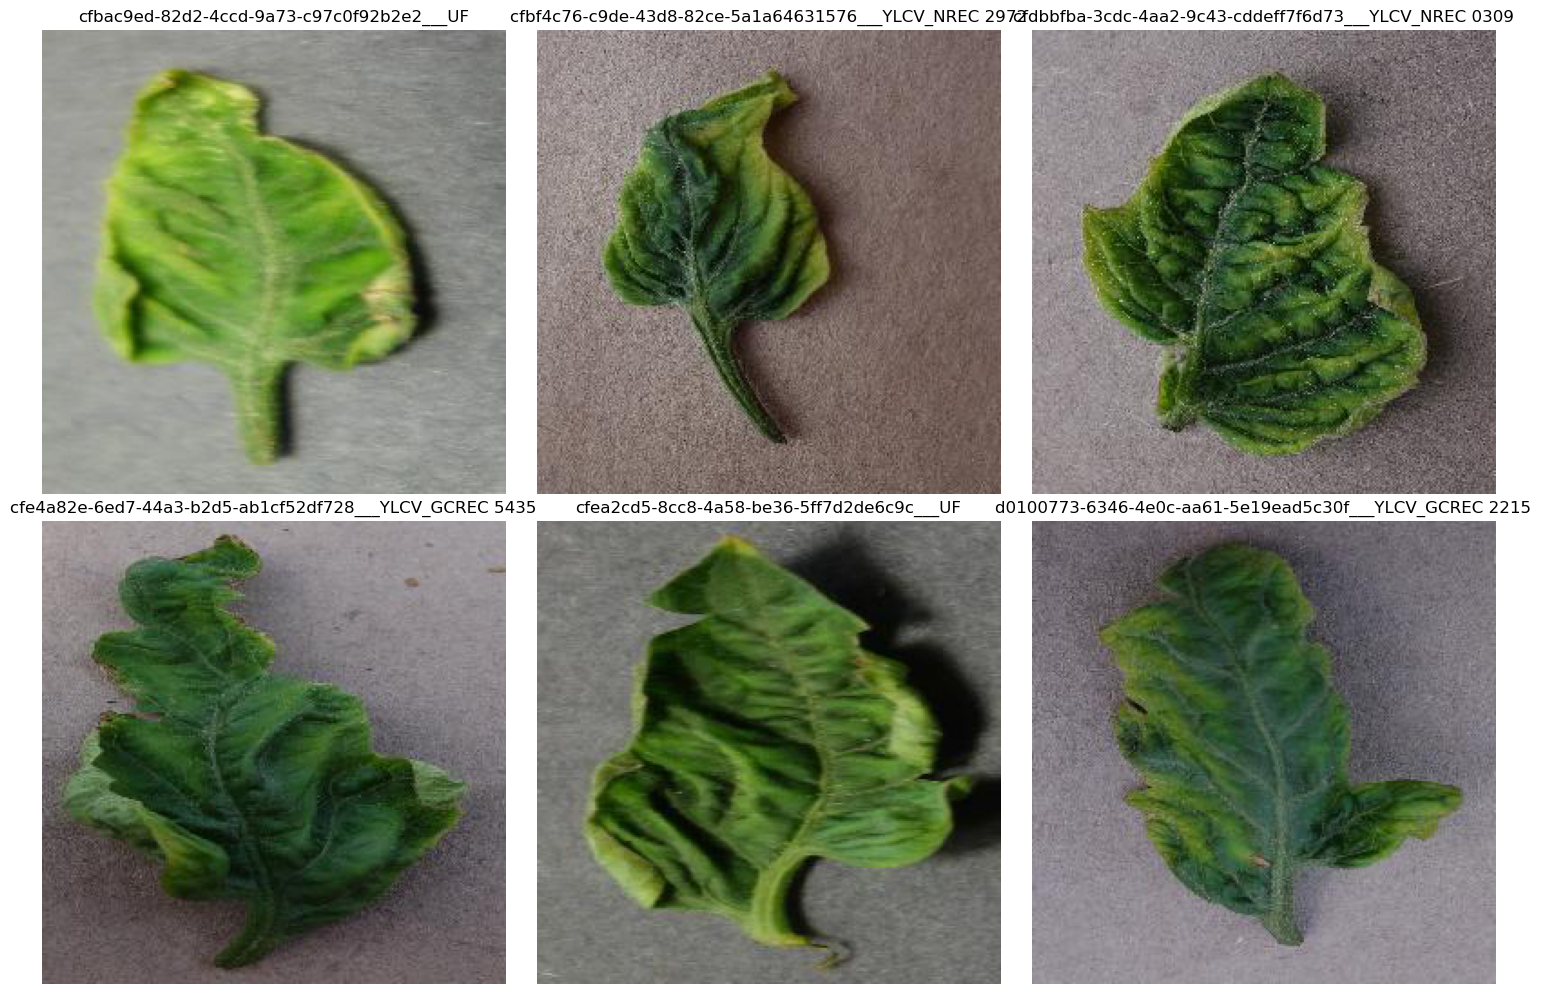

In [11]:
# Path to the directory containing images
path = r"C:\Users\Ashutosh\Internship Work\leaf disease detection\tomato\train/Tomato___Tomato_Yellow_Leaf_Curl_Virus"

# Get a list of all image file names in the directory
image_files = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]

# Display the first 6 images with their labels
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i in range(6):
    # Get the image file name and its label
    image_file = image_files[i]
    label = image_file.split('.')[0]

    # Load and display the image
    img_path = os.path.join(path, image_file)
    img = mpimg.imread(img_path)
    ax = axs[i // 3, i % 3]
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(label)

plt.tight_layout()
plt.show()

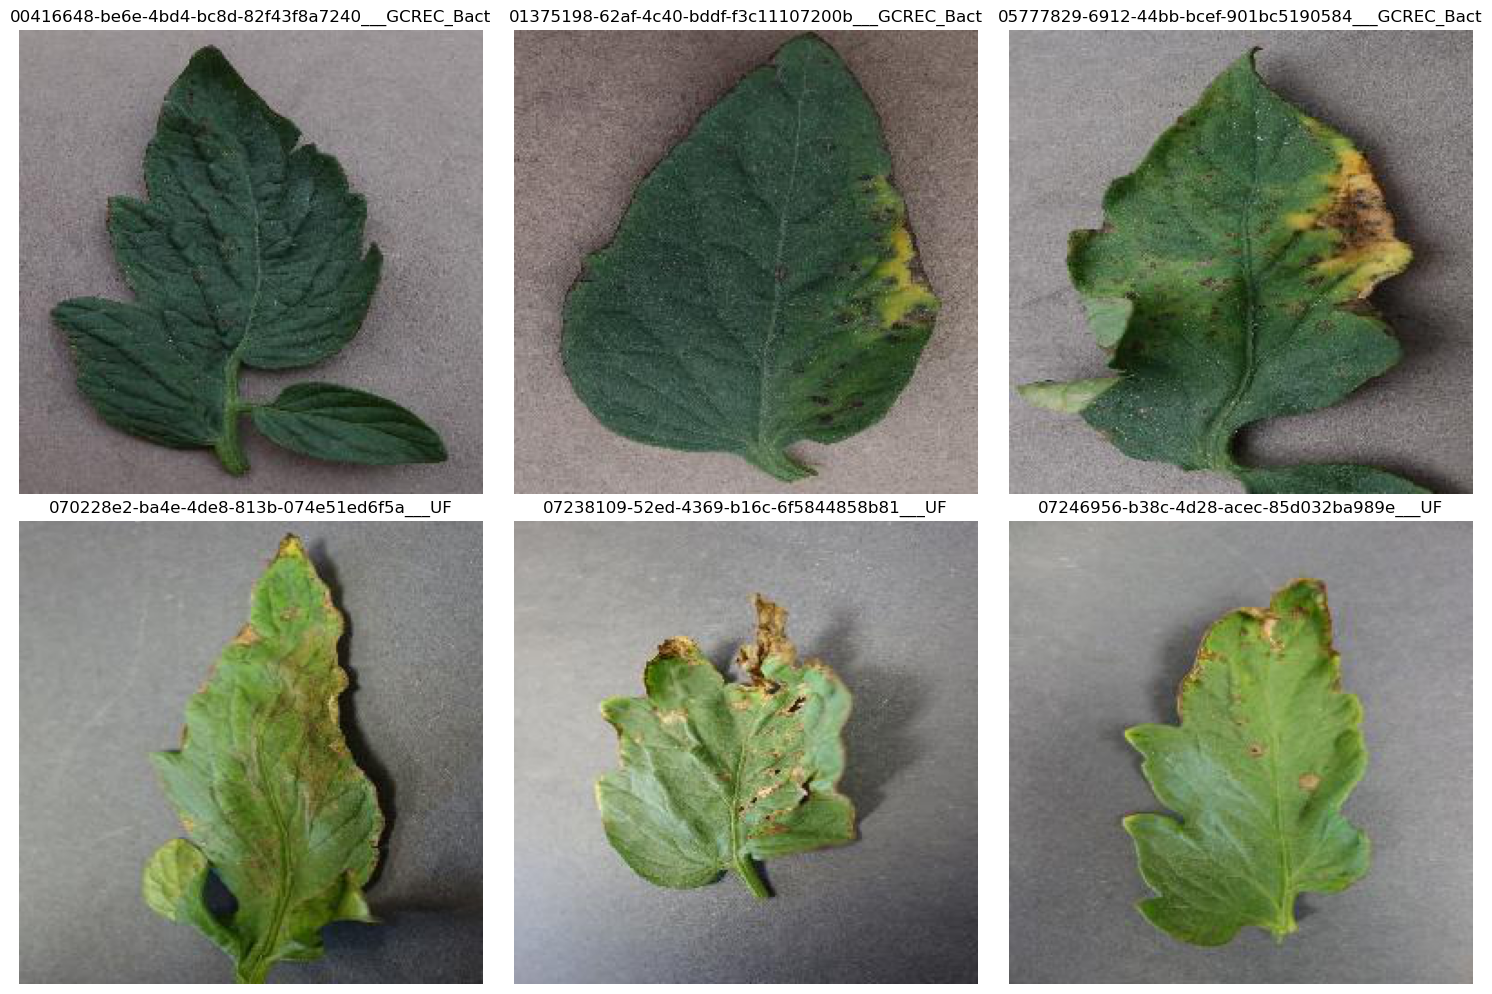

In [13]:
# Path to the directory containing images
path = r"C:\Users\Ashutosh\Internship Work\leaf disease detection\tomato\train/Tomato___Bacterial_spot"

# Get a list of all image file names in the directory
image_files = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]

# Display the first 6 images with their labels
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i in range(6):
    # Get the image file name and its label
    image_file = image_files[i]
    label = image_file.split('.')[0]

    # Load and display the image
    img_path = os.path.join(path, image_file)
    img = mpimg.imread(img_path)
    ax = axs[i // 3, i % 3]
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(label)

plt.tight_layout()
plt.show()

In [15]:
conv_base = DenseNet121(
    weights='imagenet',
    include_top = False,
    input_shape=(256,256,3),
    pooling='avg'
)

In [17]:
conv_base.trainable = False

In [19]:
model = Sequential()
model.add(conv_base)
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.35))
model.add(BatchNormalization())
model.add(Dense(120, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [21]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [23]:
# history = model.fit(train_ds,epochs=10,validation_data=validation_ds)
history = model.fit(train_data, epochs=100, validation_data=val_data, callbacks=[EarlyStopping(patience=0)])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 752s 2s/step - accuracy: 0.3362 - loss: 2.0263 - val_accuracy: 0.7630 - val_loss: 0.9013
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 718s 2s/step - accuracy: 0.7451 - loss: 0.7943 - val_accuracy: 0.8470 - val_loss: 0.5257
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 734s 2s/step - accuracy: 0.8280 - loss: 0.5562 - val_accuracy: 0.8710 - val_loss: 0.4002
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 735s 2s/step - accuracy: 0.8665 - loss: 0.4181 - val_accuracy: 0.8900 - val_loss: 0.3367
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 704s 2s/step - accuracy: 0.8928 - loss: 0.3373 - val_accuracy: 0.9060 - val_loss: 0.2932
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 717s 2s/step - accuracy: 0.9077 - loss: 0.2871 - val_accuracy: 0.9140 - val_loss: 0.2606
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 702s 2s/step - accuracy: 0.9199 - loss: 0.2489 - val_accuracy: 0.9230 - val_loss: 0.2375
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 708s 2s/step - accuracy: 0.9313 - loss: 0.2192 - 

In [24]:
# Evaluate the model on the validation data
evaluation = model.evaluate(val_data)

# Print the evaluation metrics
print("Validation Loss:", evaluation[0])
print("Validation Accuracy:", evaluation[1])

32/32 ━━━━━━━━━━━━━━━━━━━━ 67s 2s/step - accuracy: 0.9501 - loss: 0.1506
Validation Loss: 0.15827836096286774
Validation Accuracy: 0.9440000057220459
